# NORS Dataset Exploratory Data Analysis
- This notebook explores temporal patterns, outbreak severity indicators, transmission modes, and descriptive statistics using the cleaned dataset.

## 1. Import Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
import seaborn as sns
from datetime import datetime
import calendar

## 2. Load Cleaned Dataset

In [3]:
# Loading Cleaned Dataset
df = pd.read_csv("../Data/NORS_cleaned.csv")

## 3. Overview of Key Outcome Measures

,Illnesses,Hospitalizations,Deaths
count,66659.000000,58155.000000,58785.000000
mean,25.002175,0.825501,0.042375
std,42.227138,4.164555,0.436484
min,2.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,13.000000,0.000000,0.000000
75%,30.000000,1.000000,0.000000
max,990.000000,308.000000,50.000000


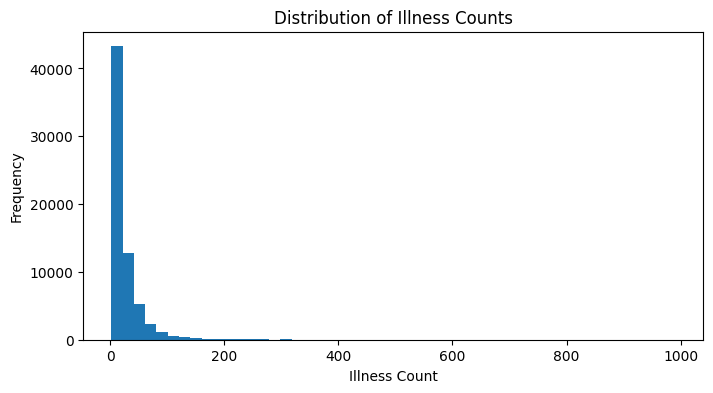

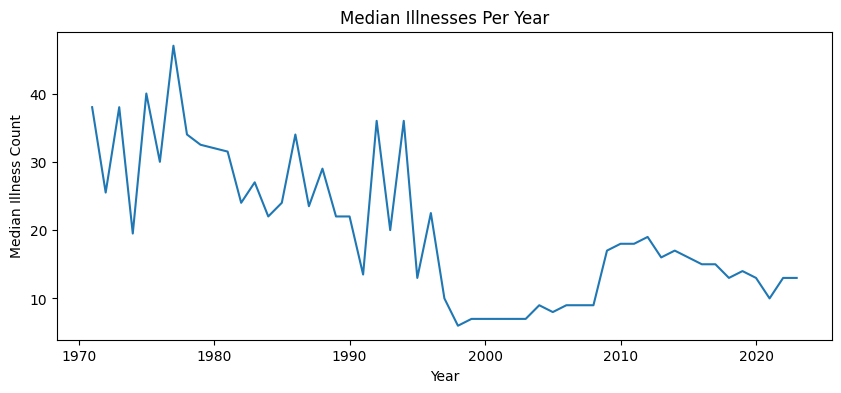

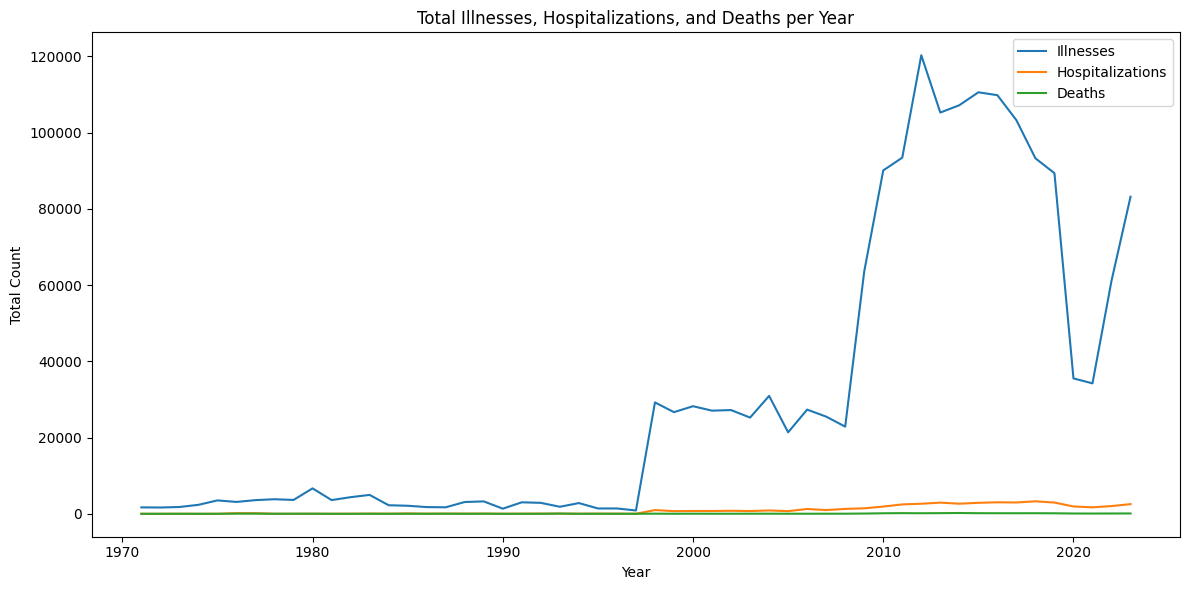

Illnesses in 2000: 28,232.0
Illnesses in 2012: 120,323.0
Percent increase (2000 to 2012): 326.2%


In [ ]:
# Data Exploration
# Summary stats for key health outcome variables
display(df[['Illnesses', 'Hospitalizations', 'Deaths']].describe())

# Median illnesses per year (better for skewed distributions)
median_by_year = df.groupby('Year')['Illnesses'].median()

# Histogram of Illnesses — shows skew (most outbreaks are small, few are very large)
plt.figure(figsize=(8,4))
df["Illnesses"].hist(bins=50)
plt.title("Distribution of Illness Counts")
plt.xlabel("Illness Count")
plt.ylabel("Frequency")
plt.grid(False)  
plt.show()

# Plot median illnesses over time
median_by_year.plot(figsize=(10,4), title="Median Illnesses Per Year")

plt.xlabel("Year")
plt.ylabel("Median Illness Count")
plt.grid(False)  
plt.show()

# Total Annual Illnesses, Hospitalizations, and Deaths
annual_totals = df.groupby('Year')[['Illnesses','Hospitalizations','Deaths']].sum()

plt.figure(figsize=(12,6))
plt.plot(annual_totals.index, annual_totals['Illnesses'], label='Illnesses')
plt.plot(annual_totals.index, annual_totals['Hospitalizations'], label='Hospitalizations')
plt.plot(annual_totals.index, annual_totals['Deaths'], label='Deaths')

plt.title("Total Illnesses, Hospitalizations, and Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.grid(False)  
plt.legend()
plt.tight_layout()
plt.show()

# Percent increase 2000 to 2012
ill_2000 = annual_totals.loc[2000, 'Illnesses']
ill_2012 = annual_totals.loc[2012, 'Illnesses']
pct_increase = ((ill_2012 - ill_2000) / ill_2000) * 100

print(f"Illnesses in 2000: {ill_2000:,}")
print(f"Illnesses in 2012: {ill_2012:,}")
print(f"Percent increase (2000 to 2012): {pct_increase:.1f}%")

## 4. Create Study Subset

In [5]:
# Subset creation
df_subset = df[df["Year"] >= 2000].copy()

## 5. Subset Overview

In [33]:
# Dataset info
num_rows = df_subset.shape[0]
num_columns = df_subset.shape[1]
years_covered = "2000–2024"

# Total outbreaks
total_outbreaks = num_rows

# Outbreaks by primary mode (Foodborne, Waterborne, etc.)
outbreaks_by_mode = df_subset['Primary Mode'].value_counts()

# Total reported illnesses
total_illnesses = df_subset['Illnesses'].sum()

# Average illnesses per outbreak
avg_illnesses = df_subset['Illnesses'].mean()

# Outbreaks with deaths
outbreaks_with_deaths = df_subset[df_subset['Deaths'] > 0].shape[0]

# Peak outbreak year (most outbreaks)
peak_outbreak_year = df_subset['Year'].value_counts().idxmax()
peak_outbreak_count = df_subset['Year'].value_counts().max()

# Peak illness year (most total illnesses)
illnesses_by_year = df_subset.groupby('Year')['Illnesses'].sum()
peak_illness_year = illnesses_by_year.idxmax()
peak_illness_count = illnesses_by_year.max()

# Display results
print(f"Rows: {num_rows}")
print(f"Columns: {num_columns}")
print(f"Years covered: {years_covered}")
print(f"Total outbreaks: {total_outbreaks}")
print("Outbreaks by Primary Mode:")
print(outbreaks_by_mode)
print(f"Total reported illnesses: {total_illnesses}")
print(f"Average illnesses per outbreak: {avg_illnesses:.1f}")
print(f"Outbreaks with deaths: {outbreaks_with_deaths}")
print(f"Peak outbreak year: {peak_outbreak_year} ({peak_outbreak_count} outbreaks)")
print(f"Peak illness year: {peak_illness_year} ({int(peak_illness_count)} illnesses)")


Rows: 62964
Columns: 20
Years covered: 2000–2024
Total outbreaks: 62964
Outbreaks by Primary Mode:
Primary Mode
Person-to-person                                     32414
Food                                                 22076
Indeterminate/unknown                                 5677
Water                                                 2010
Animal contact                                         655
Environmental contamination other than food/water      132
Name: count, dtype: int64
Total reported illnesses: 1536265.0
Average illnesses per outbreak: 24.4
Outbreaks with deaths: 1513
Peak outbreak year: 2016 (4331 outbreaks)
Peak illness year: 2012 (120323 illnesses)


## Visualizations

In [ ]:
# Defining a number formatter function to convert large numbers to K / M / B
def format_kmb(x, pos=None):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    else:
        return str(int(x))

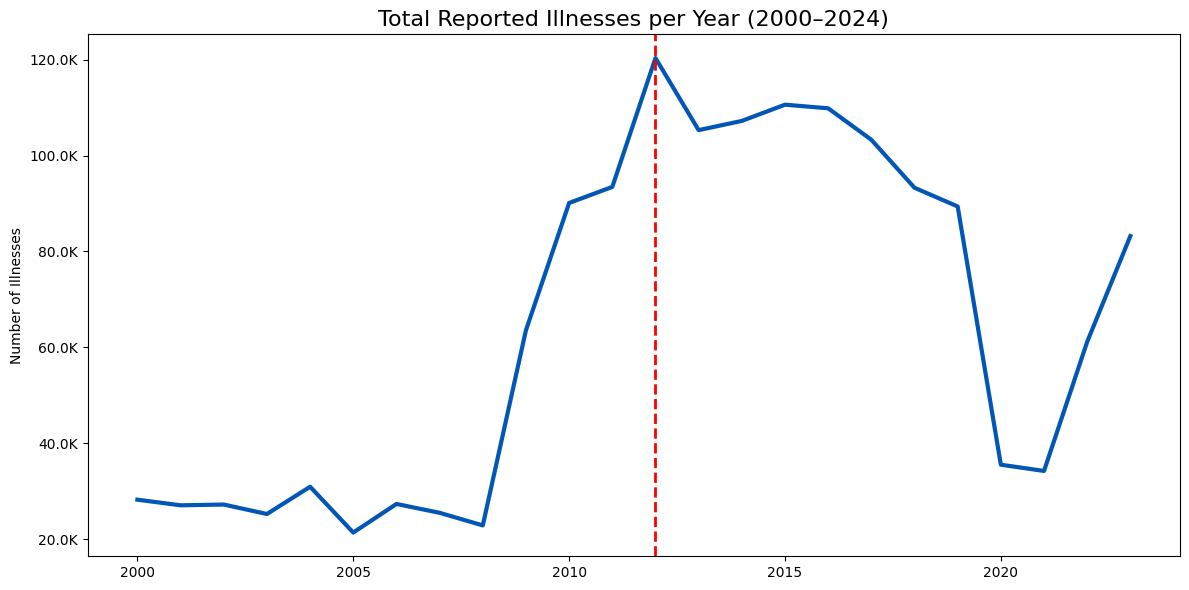

In [28]:
# 1. Annual Illness Trends (2000–2024)
## Question: What were the annual illness trends from 2000–2024?

annual = df_subset.groupby("Year")["Illnesses"].sum()

plt.figure(figsize=(12,6))
plt.plot(annual.index, annual.values, color='#0256b5', linewidth=3)
plt.axvline(2012, color='red', linestyle='--', linewidth=2)
plt.title("Total Reported Illnesses per Year (2000–2024)", fontsize=16)
plt.ylabel("Number of Illnesses")
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.grid(False) 

# Save figure
plt.savefig("../Figures/annual_illness_trends.png", dpi=300, bbox_inches='tight')

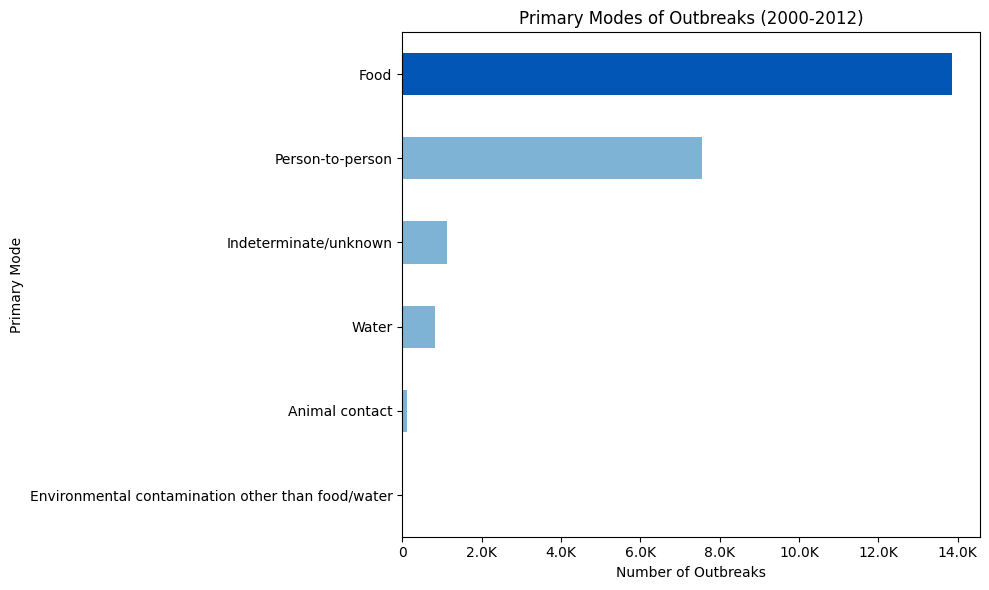

In [ ]:
# 2. Transmission Mode Shifts (2000–2012)
## Question: Which primary transmission modes were most common across all reported outbreaks from 2000–2024?

# Subset data for 2000–2012
subset_2012 = df_subset[df_subset["Year"].between(2000, 2012)]

# Compute mode counts for the period
mode_counts = subset_2012['Primary Mode'].value_counts()

# Highlight top mode
colors = ['#0256b5' if i == 0 else '#7fb3d5' for i in range(len(mode_counts))]

# Plot
plt.figure(figsize=(10,6))
ax = mode_counts.plot(kind='barh', color=colors)
plt.xlabel('Number of Outbreaks')
plt.ylabel('Primary Mode')
plt.title('Primary Modes of Outbreaks (2000-2012)')
plt.gca().invert_yaxis()

# Apply x-axis formatter
ax.xaxis.set_major_formatter(FuncFormatter(format_kmb))

plt.tight_layout()
plt.grid(False) 

# Save figure
plt.savefig("../Figures/transmission_mode_shifts.png", dpi=300)

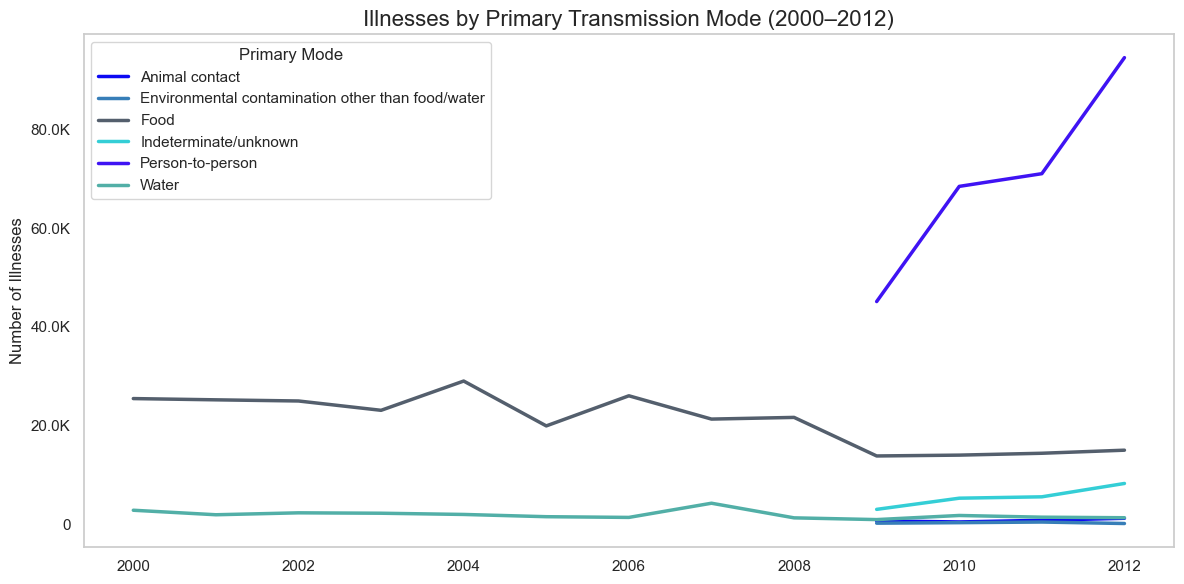

In [ ]:
# 2.5 Transmission Mode Shifts (2000–2012)
## Question: How did illness counts differ across primary transmission modes?

# Compute mode counts for the period
mode_year = subset_2012.groupby(["Year","Primary Mode"])["Illnesses"].sum().unstack()

# Palette
palette = ["#0C09F3", '#377EB8', "#545f6d","#34CED6", "#3F13F3", "#52AFA7"] 

plt.figure(figsize=(12,6))

# Plot each line with a color from the palette
for i, mode in enumerate(mode_year.columns):
    plt.plot(mode_year.index, mode_year[mode], label=mode, color=palette[i % len(palette)], linewidth=2.5)

plt.title("Illnesses by Primary Transmission Mode Over Time (2000–2012)", fontsize=16)
plt.ylabel("Number of Illnesses") 
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.legend(title="Primary Mode")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.grid(False) 
plt.show()

# Save figure
plt.savefig("../Figures/illnesses_by_transmission_mode.png", dpi=300)

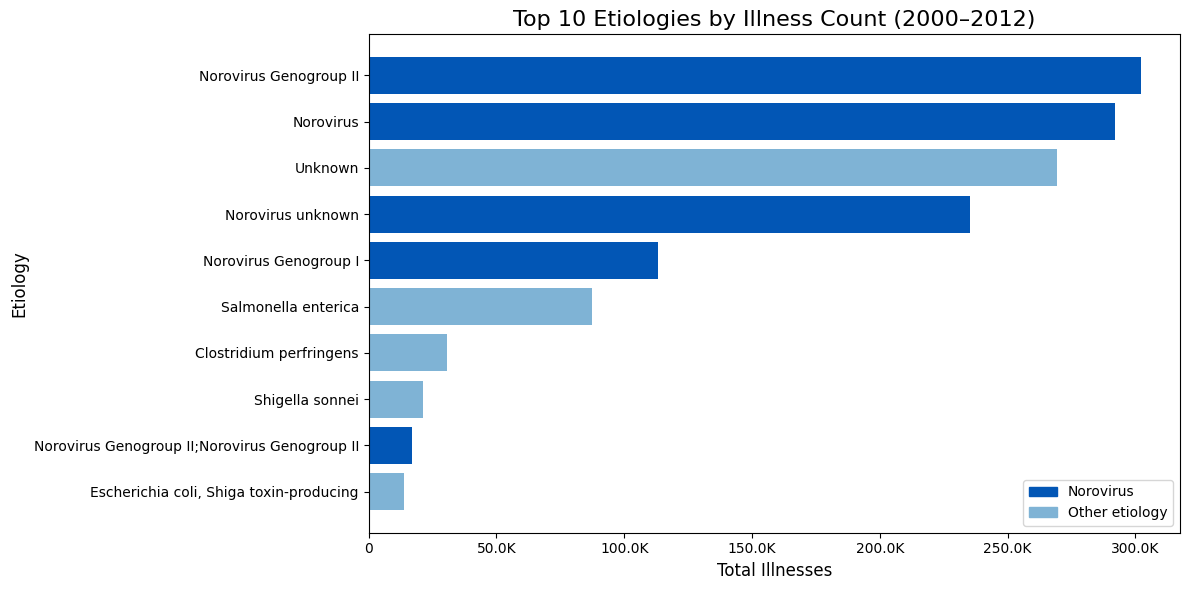

In [29]:
# 3. Illnesses by Etiology (2000-2012)
## Question: what etiologies were the most frequent between 2000-2012?

# Sum illnesses by etiology (2000–2012 subset)
etiology_0012 = (
    df_subset.groupby("Etiology")["Illnesses"]
    .sum()
    .sort_values(ascending=False)
)

# Top 10 etiologies
top_etiology_0012 = etiology_0012.head(10)

# Palette
colors = [
    "#0256b5" if "noro" in et.lower() else "#7fb3d5"
    for et in top_etiology_0012.index
]

plt.figure(figsize=(12,6))
plt.barh(top_etiology_0012.index, top_etiology_0012.values, color=colors)

plt.title("Top 10 Etiologies by Illness Count (2000–2012)", fontsize=16)
plt.xlabel("Total Illnesses", fontsize=12)
plt.ylabel("Etiology", fontsize=12)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.gca().invert_yaxis()  # largest at top

# Key 
norovirus_patch = mpatches.Patch(color="#0256b5", label="Norovirus")
other_patch     = mpatches.Patch(color="#7fb3d5", label="Other etiology")
plt.legend(handles=[norovirus_patch, other_patch], loc="lower right")

plt.tight_layout()
plt.grid(False)

# Save figure
plt.savefig("../Figures/illnesses_by_etiology.png", dpi=300)


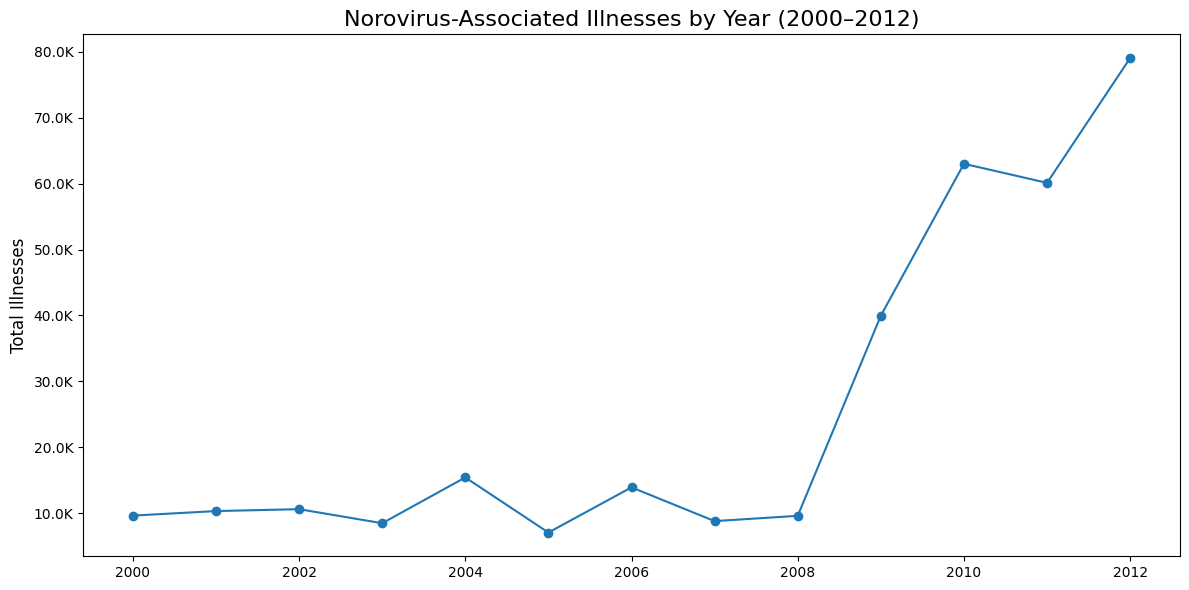

In [30]:
# 3.5 Illnesses by Etiology (2000-2012)
## Question: How did norovirus illness counts change from 2000–2012

# Filter for years 2000–2012
df_0012 = df_subset[(df_subset["Year"] >= 2000) & (df_subset["Year"] <= 2012)].copy()

# Standardize etiology text to avoid mismatched cases (e.g., "Norovirus", "norovirus", "Norwalk")
df_0012["Etiology_clean"] = df_0012["Etiology"].str.lower()

# Filter for Norovirus outbreaks only
noro_df = df_0012[df_0012["Etiology_clean"].str.contains("noro")]

# Sum illnesses by year
noro_by_year = (
    noro_df.groupby("Year")["Illnesses"]
    .sum()
    .reindex(range(2000, 2012+1), fill_value=0)
)

# Plot
plt.figure(figsize=(12,6))
plt.plot(noro_by_year.index, noro_by_year.values, marker="o")

plt.title("Norovirus-Associated Illnesses by Year (2000–2012)", fontsize=16)
plt.ylabel("Total Illnesses", fontsize=12)
plt.grid(True, alpha=0.3)

# Format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kmb))

plt.tight_layout()
plt.grid(False) 

# Save figure
plt.savefig("../Figures/norovirus_illness_trends.png", dpi=300)

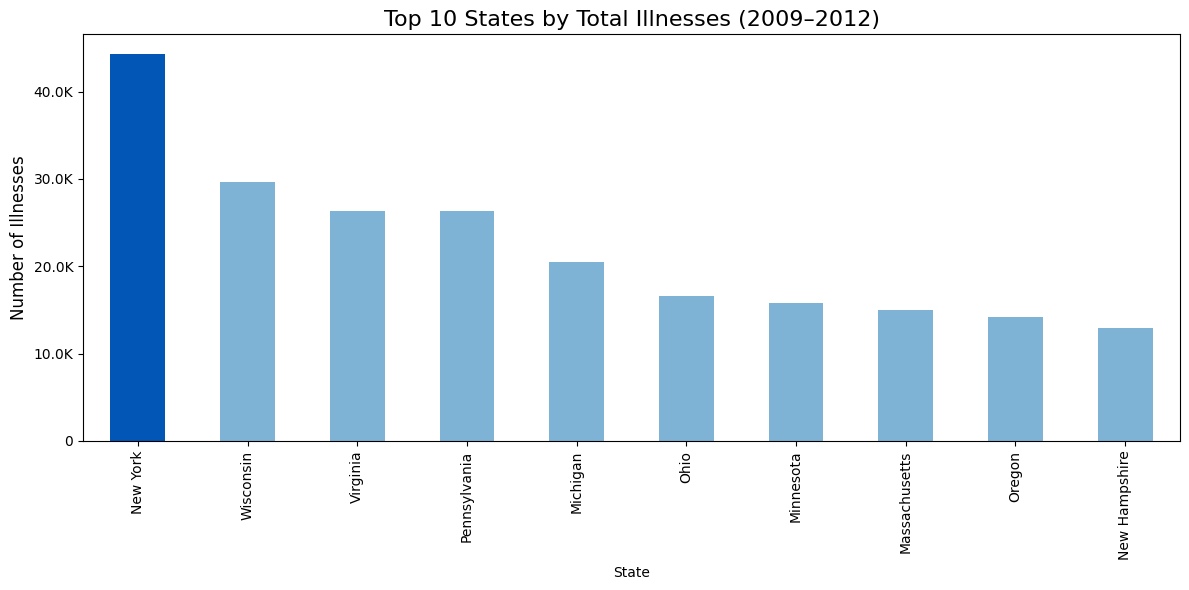

In [32]:
# 4 State-Level Growth During 2009–2012 
## Question 1: Which states had the highest total illnesses from 2009–2012?

# Filter data for 2009–2012
subset_peak = df_subset[df_subset["Year"].between(2009, 2012)]

# Sum illnesses by state 
state_totals_peak = (
    subset_peak.groupby("State")["Illnesses"]
    .sum()
    .sort_values(ascending=False)
)

# Highlight top state 
colors = ['#0256b5' if val == state_totals_peak.max() else '#7fb3d5' for val in state_totals_peak.head(10)]

# Plot
plt.figure(figsize=(12,6))
ax = state_totals_peak.head(10).plot(kind="bar", color=colors)

plt.title("Top 10 States by Total Illnesses (2009–2012)", fontsize=16)
plt.ylabel("Number of Illnesses", fontsize=12)

# Apply number formatting to y-axis
ax.yaxis.set_major_formatter(FuncFormatter(format_kmb))

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.grid(False) 

# Save figure
plt.savefig("../Figures/state_level_totals_2009_2012.png", dpi=300)

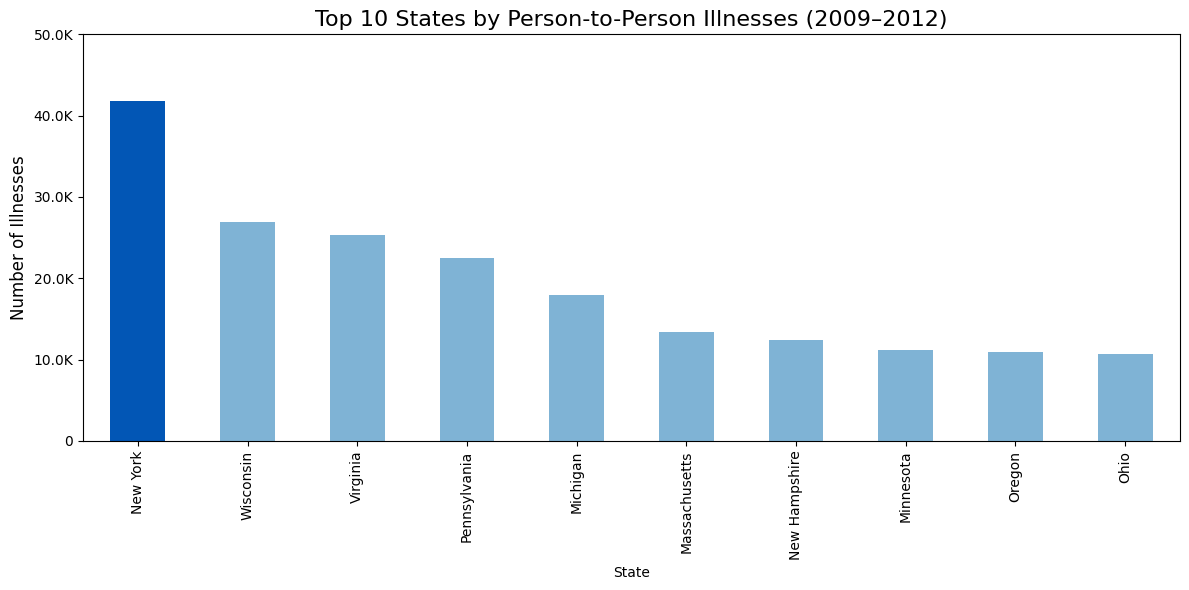

In [33]:
# 4.5 State-Level Growth During 2009–2012 
## Question 2: Which states had the highest person-to-person illnesses from 2009–2012?

# Filter data for 2009–2012 AND Person-to-person transmission
subset_p2p = df_subset[
    df_subset["Year"].between(2009, 2012) &
    (df_subset["Primary Mode"] == "Person-to-person")
]

# Sum illnesses by state
state_p2p_totals = (
    subset_p2p.groupby("State")["Illnesses"]
    .sum()
    .sort_values(ascending=False)
)

# Top 10 states
top10_p2p = state_p2p_totals.head(10)

# Palette
colors = ['#7fb3d5' if val != top10_p2p.max() else '#0256b5' for val in top10_p2p]

# Plot
plt.figure(figsize=(12,6))
ax = top10_p2p.plot(kind="bar", color=colors)

plt.title("Top 10 States by Person-to-Person Illnesses (2009–2012)", fontsize=16)
plt.ylabel("Number of Illnesses", fontsize=12)

# Set y-axis ticks at 10,000 increments
max_y = int(top10_p2p.max())
plt.yticks(range(0, max_y + 10000, 10000))

# Format y-axis labels 
ax.yaxis.set_major_formatter(FuncFormatter(format_kmb))

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.grid(False) 

# Save figure
plt.savefig("../Figures/state_level_person_to_person_2009_2012.png", dpi= 300)


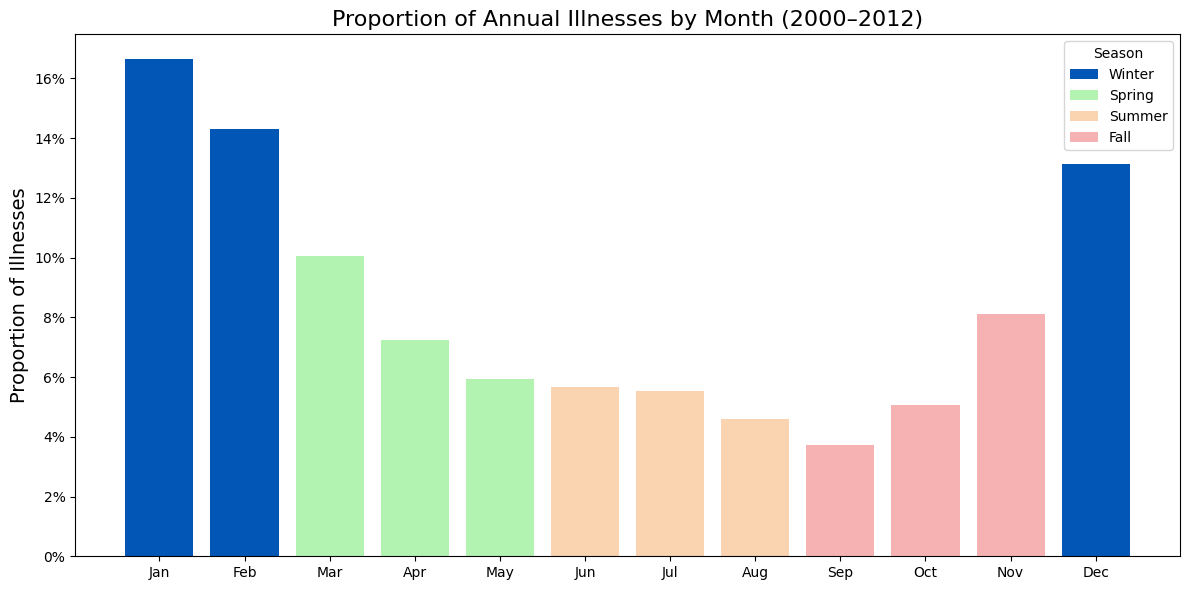

In [34]:
# 5 Seasonal Pattern Shift (2000–2012)
## Question: How did seasonal patterns in illnesses vary throughout the year from 2000–2012

# Calculate monthly illnesses and proportions
monthly = subset_2012.groupby("Month")["Illnesses"].sum()
monthly_prop = monthly / monthly.sum()

# Map months to names
month_names = [calendar.month_abbr[m] for m in monthly_prop.index]

# Define seasons by month
season_labels = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
monthly_seasons = [season_labels[m] for m in monthly_prop.index]

# Assign colors to seasons
season_colors = {'Winter':"#0256b5", 'Spring':"#b2f3b2", 'Summer':"#fad3b0", 'Fall':"#f6b2b2"}
bar_colors = [season_colors[season] for season in monthly_seasons]

# Plot
plt.figure(figsize=(12,6))
plt.bar(month_names, monthly_prop.values, color=bar_colors)

plt.title("Proportion of Annual Illnesses by Month (2000–2012)", fontsize=16)
plt.ylabel("Proportion of Illnesses", fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.0%}"))

# Add legend for seasons
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=season) for season, color in season_colors.items()]
plt.legend(handles=legend_elements, title="Season")

plt.tight_layout()
plt.grid(False)

# Save figure
plt.savefig("../Figures/seasonal_pattern_shift.png", dpi=300)

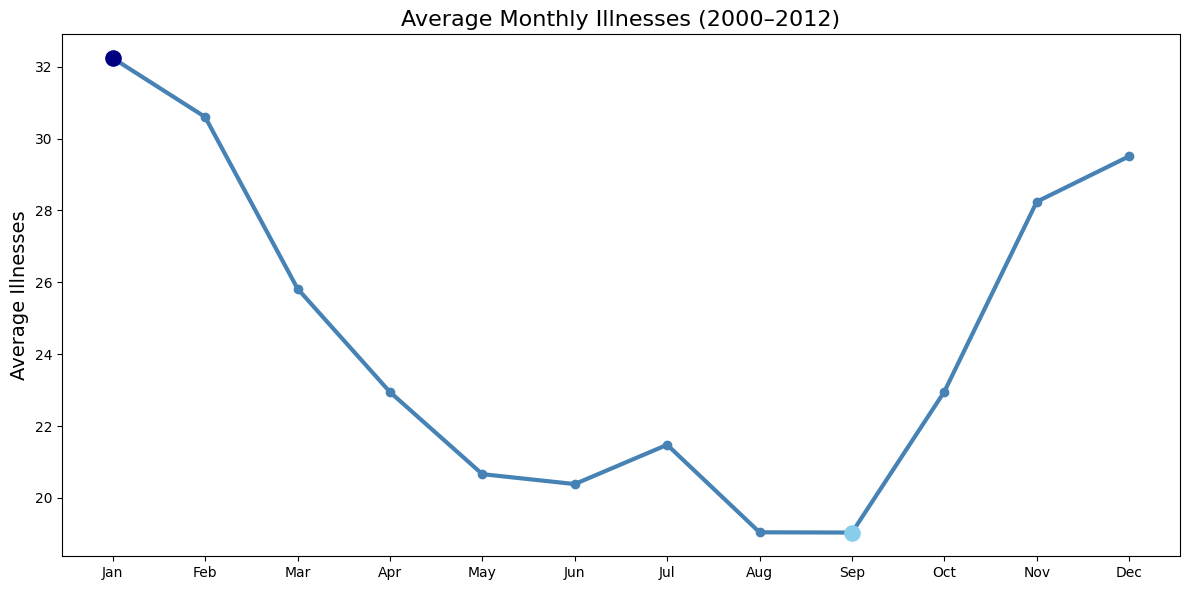

In [35]:
# 5.5 Seasonal Pattern Shift (2000–2012)
## Question: What were the average monthly illness counts from 2000–2012?

# Calculate average monthly illnesses
monthly_avg = subset_2012.groupby("Month")["Illnesses"].mean()

# Map months to names
month_names = [calendar.month_abbr[m] for m in monthly_avg.index]

# Identify max and min
max_idx = monthly_avg.idxmax()
min_idx = monthly_avg.idxmin()

max_x  = calendar.month_abbr[max_idx]
min_x  = calendar.month_abbr[min_idx]
max_y  = monthly_avg.loc[max_idx]
min_y  = monthly_avg.loc[min_idx]

# Plot
plt.figure(figsize=(12,6))
plt.plot(month_names, monthly_avg.values, marker="o", linewidth=3, color="steelblue")

# Highlight max (darker blue)
plt.scatter(max_x, max_y, s=120, color="navy", zorder=3)

# Highlight min (lighter blue)
plt.scatter(min_x, min_y, s=120, color="skyblue", zorder=3)

plt.title("Average Monthly Illnesses (2000–2012)", fontsize=16)
plt.ylabel("Average Illnesses", fontsize=14)

# Remove gridlines
plt.grid(False)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.tight_layout()

# Save figure
plt.savefig("../Figures/average_monthly_illnesses_2000_2012.png", dpi=300)

/var/folders/p3/cb9yqkz55rzbcyqz_jw56g3r0000gn/T/ipykernel_19240/1161763785.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_setting_top['Other'] = year_setting.drop(columns=top_settings_list).sum(axis=1)


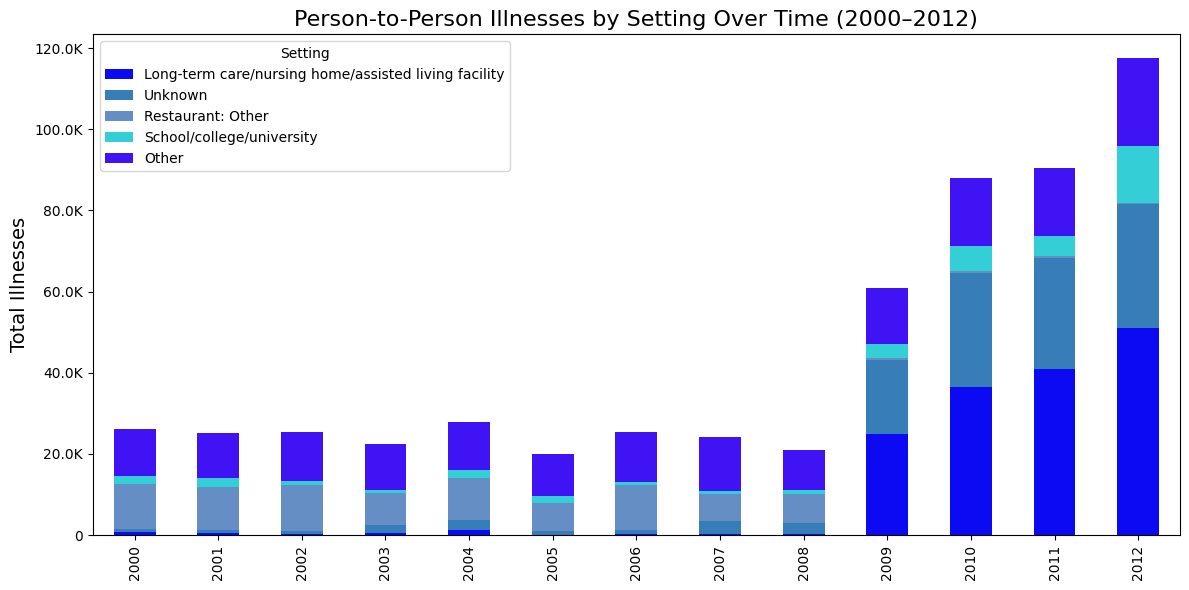

In [36]:
# 6. Setting Impact (2000–2012)
## Question: Which settings accounted for the largest proportion of illnesses?

# Subset and aggregate
year_setting = subset_2012.groupby(['Year','Setting'])['Illnesses'].sum().unstack(fill_value=0)

# Keep only top settings and combine rest as 'Other'
top_settings_list = year_setting.sum().sort_values(ascending=False).head(5).index
year_setting_top = year_setting[top_settings_list]
year_setting_top['Other'] = year_setting.drop(columns=top_settings_list).sum(axis=1)

# Palette
palette = ["#0C09F3", '#377EB8', "#658ec5","#34CED6", "#3F13F3", "#435F7A"]

# Plot stacked bar with palette
ax = year_setting_top.plot(kind='bar', stacked=True, figsize=(12,6), color=palette)

# Format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kmb))

# Titles and labels
plt.title("Person-to-Person Illnesses by Setting Over Time (2000–2012)", fontsize=16)
plt.ylabel("Total Illnesses", fontsize=14)
plt.xlabel("")

plt.tight_layout()
plt.grid(False)

# Save figure
plt.savefig("../Figures/person_to_person_illnesses_by_setting.png", dpi=300)

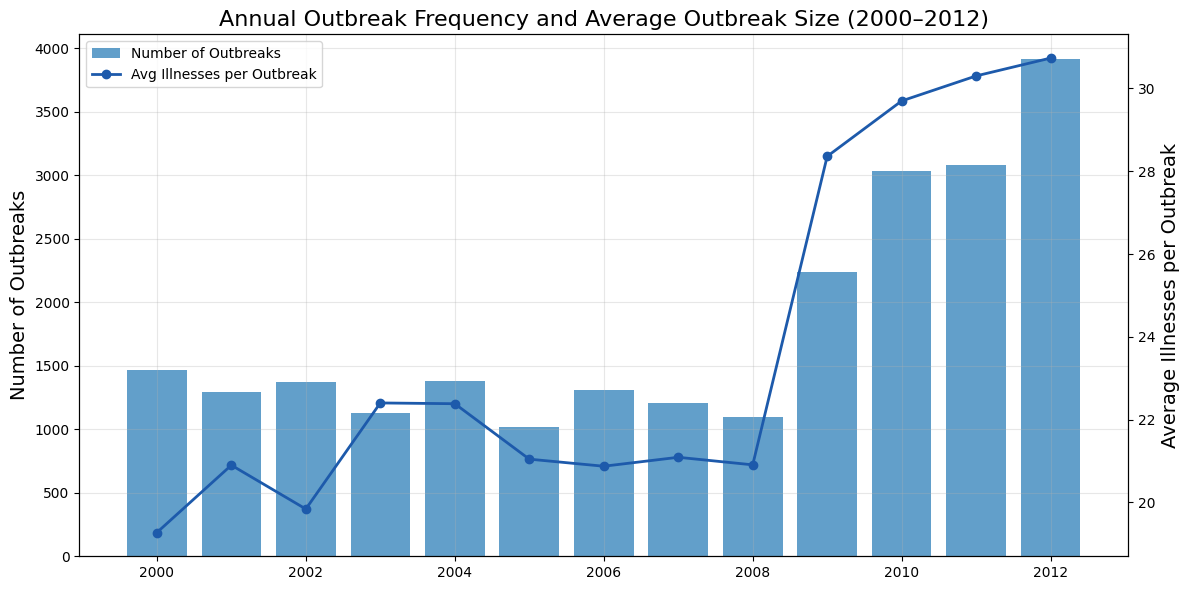

In [37]:
# 7. Outbreak vs Severity (2000–2012)
## Question: Were illness increases caused by more outbreaks or by larger outbreaks?

# Aggregate data by year
yearly = subset_2012.groupby('Year').agg(
    total_outbreaks=('Month', 'count'),  # number of outbreaks
    total_illnesses=('Illnesses', 'sum')  # total illnesses
).reset_index()

# Calculate average illnesses per outbreak
yearly['avg_illnesses_per_outbreak'] = yearly['total_illnesses'] / yearly['total_outbreaks']

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot (number of outbreaks)
ax1.bar(yearly['Year'], yearly['total_outbreaks'], alpha=0.7, label='Number of Outbreaks')
ax1.set_ylabel('Number of Outbreaks', fontsize=14)
ax1.tick_params(axis='y')

# Line plot (average illnesses per outbreak)
ax2 = ax1.twinx()
ax2.plot(yearly['Year'], yearly['avg_illnesses_per_outbreak'], color='#1d5aab', marker='o', linewidth=2, label='Avg Illnesses per Outbreak')
ax2.set_ylabel('Average Illnesses per Outbreak', fontsize=14)
ax2.tick_params(axis='y')

# Format
plt.title('Annual Outbreak Frequency and Average Outbreak Size (2000–2012)', fontsize=16)
ax1.grid(alpha=0.3)
ax1.set_xlabel('')

# Legend
lines_labels = [ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.grid(False)

# Save figure
plt.savefig("../Figures/outbreaks_vs_severity_2000_2012.png", dpi=300)

## Post-EDA Exploration

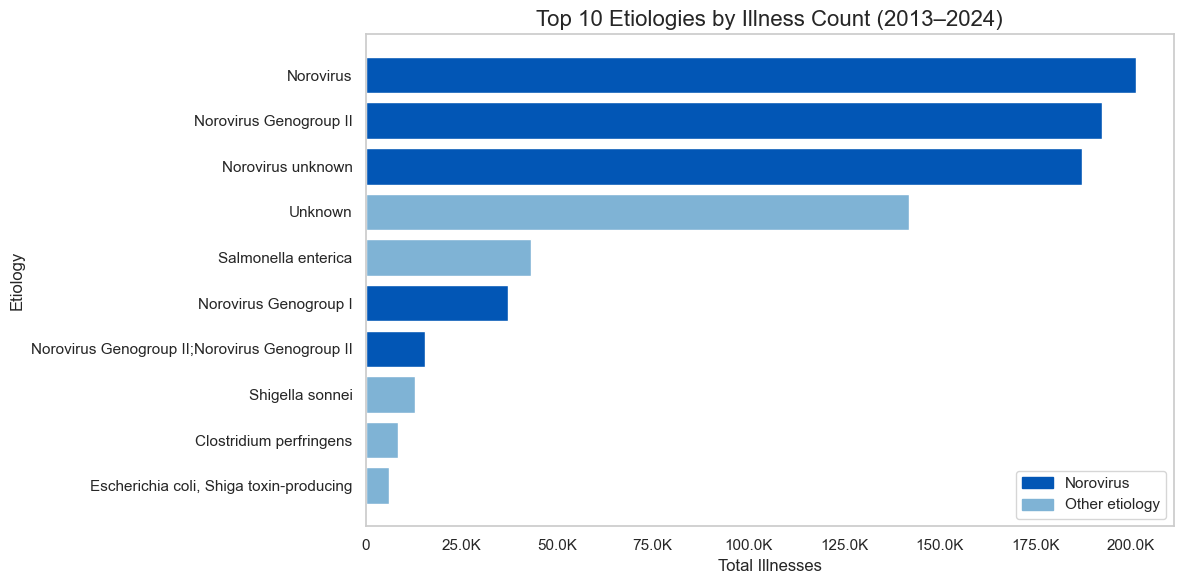

In [ ]:
# What were the top 10 Etiologies between 2013 and 2024?

# Filter data for >2012 
df_2013_24 = df_subset[df_subset["Year"] > 2012]

# Sum illnesses by etiology
etiology_2013_24 = (
    df_2013_24.groupby("Etiology")["Illnesses"]
    .sum()
    .sort_values(ascending=False)
)

# Top 10 etiologies
top_etiology_2013_24 = etiology_2013_24.head(10)

# Palette
colors = [
    "#0256b5" if "noro" in et.lower() else "#7fb3d5"
    for et in top_etiology_2013_24.index
]

plt.figure(figsize=(12,6))
plt.barh(top_etiology_2013_24.index, top_etiology_2013_24.values, color=colors)

plt.title("Top 10 Etiologies by Illness Count (2013–2024)", fontsize=16)
plt.xlabel("Total Illnesses", fontsize=12)
plt.ylabel("Etiology", fontsize=12)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.gca().invert_yaxis()  # largest at top
plt.grid(False)

# Key 
norovirus_patch = mpatches.Patch(color="#0256b5", label="Norovirus")
other_patch     = mpatches.Patch(color="#7fb3d5", label="Other etiology")
plt.legend(handles=[norovirus_patch, other_patch], loc="lower right")

plt.tight_layout()
plt.show()



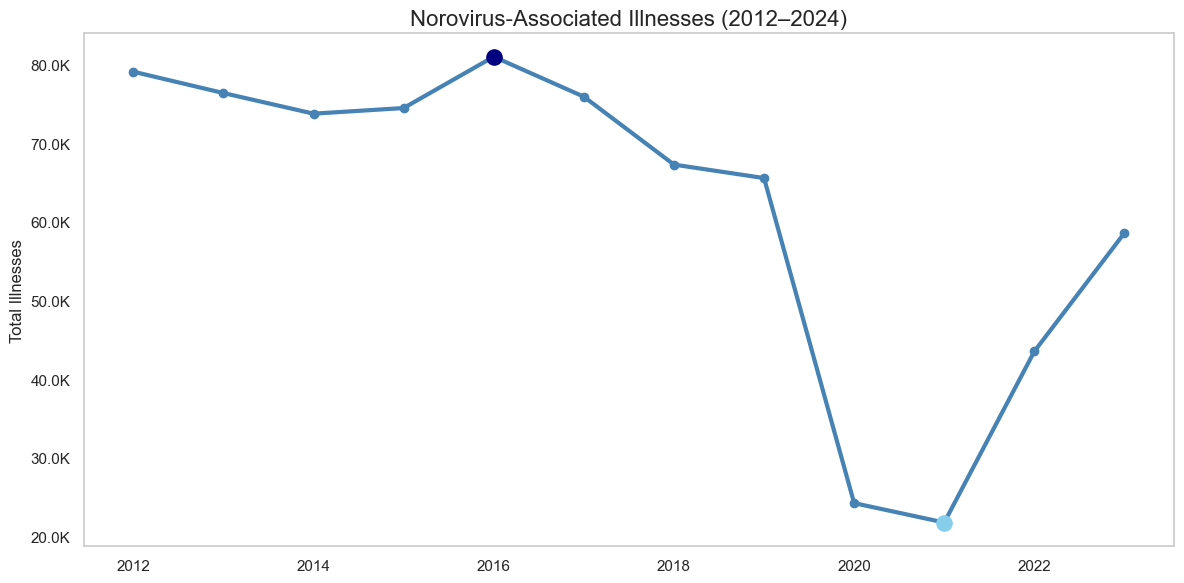

In [ ]:
# How did norovirus illness trends change after the 2012 spike?

# Filter years 2012–2024
df_1224 = df_subset[(df_subset["Year"] >= 2012) & (df_subset["Year"] <= 2024)].copy()

# Keep only norovirus-related outbreaks 
df_1224["Etiology_clean"] = df_1224["Etiology"].str.lower()
df_noro_1224 = df_1224[df_1224["Etiology_clean"].str.contains("noro", na=False)]

# Summarize yearly illnesses
noro_yearly_1224 = (
    df_noro_1224.groupby("Year")["Illnesses"]
    .sum()
    .reset_index()
)

# Identify min/max
max_row = noro_yearly_1224.loc[noro_yearly_1224["Illnesses"].idxmax()]
min_row = noro_yearly_1224.loc[noro_yearly_1224["Illnesses"].idxmin()]

# Plot
plt.figure(figsize=(12,6))
plt.plot(
    noro_yearly_1224["Year"],
    noro_yearly_1224["Illnesses"],
    marker="o",
    linewidth=3,
    color="steelblue"
)

# highlight max 
plt.scatter(max_row["Year"], max_row["Illnesses"], s=120, color="navy", zorder=3)

# highlight min 
plt.scatter(min_row["Year"], min_row["Illnesses"], s=120, color="skyblue", zorder=3)

plt.title("Norovirus-Associated Illnesses (2012–2024)", fontsize=16)
plt.ylabel("Total Illnesses", fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kmb))

plt.grid(False)

plt.tight_layout()
plt.show()

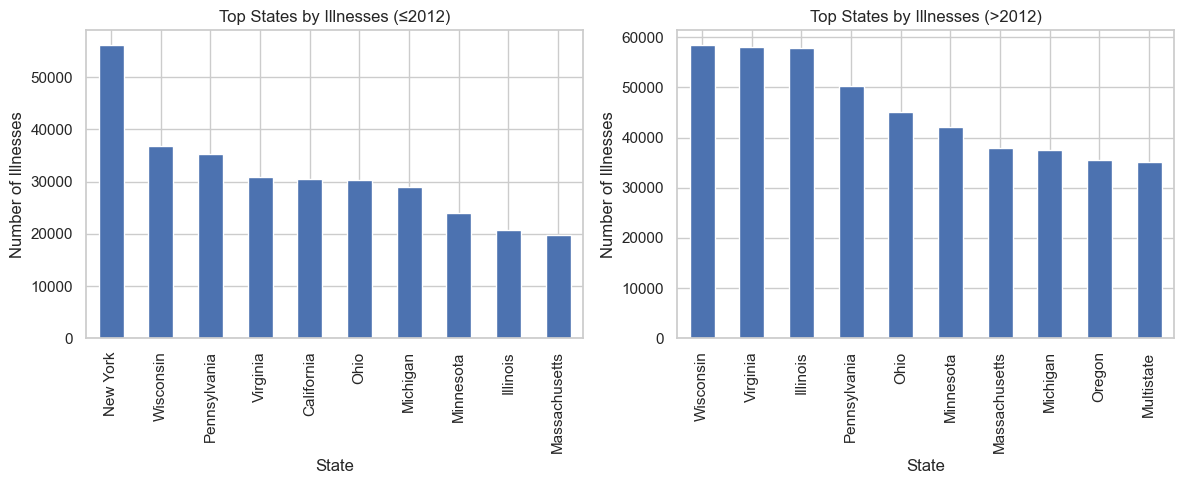

In [ ]:
# Are the top states pre-2012 the same “drivers” post-2012? (Illnesses)

pre = df_subset[df_subset.Year <= 2012].groupby("State")["Illnesses"].sum().sort_values(ascending=False).head(10)
post = df_subset[df_subset.Year > 2012].groupby("State")["Illnesses"].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(1,2, figsize=(12,5))
pre.plot(kind='bar', ax=ax[0]); ax[0].set_title("Top States by Illnesses (≤2012)")
post.plot(kind='bar', ax=ax[1]); ax[1].set_title("Top States by Illnesses (>2012)")
for a in ax: 
    a.set_ylabel("Number of Illnesses")
plt.tight_layout()
plt.show()

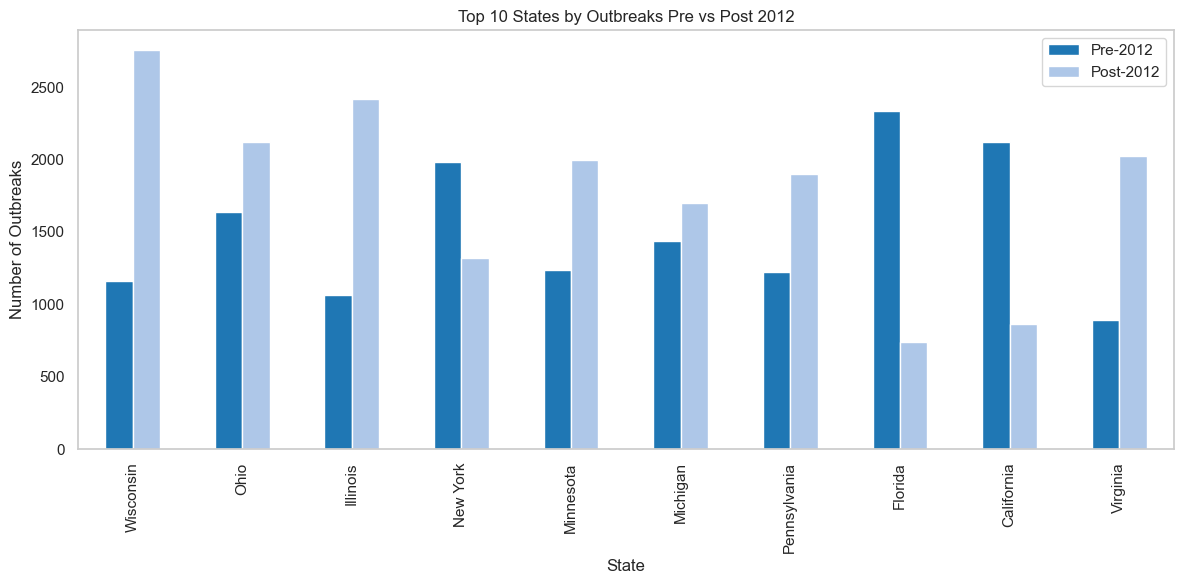

In [ ]:
# Are the top states pre-2012 the same “drivers” post-2012? (outbreaks)

# Pre and post 2012 partitions
pre = df[df["Year"] <= 2012]
post = df[df["Year"] > 2012]

# Outbreak counts (just count rows)
outbreaks_pre = pre.groupby("State").size().sort_values(ascending=False)
outbreaks_post = post.groupby("State").size().sort_values(ascending=False)

# Side-by-side Comparison
outbreak_compare = pd.concat(
    [outbreaks_pre.rename("Pre-2012"), outbreaks_post.rename("Post-2012")],
    axis=1
).fillna(0)

outbreak_compare.head(10)

# Plot
top_states = outbreak_compare.sum(axis=1).sort_values(ascending=False).head(10).index

outbreak_compare.loc[top_states].plot(
    kind="bar",
    figsize=(12,6),
    color=["#1f77b4", "#aec7e8"]  
)

plt.title("Top 10 States by Outbreaks Pre vs Post 2012")
plt.ylabel("Number of Outbreaks")
plt.tight_layout()
plt.grid(False)
plt.show()


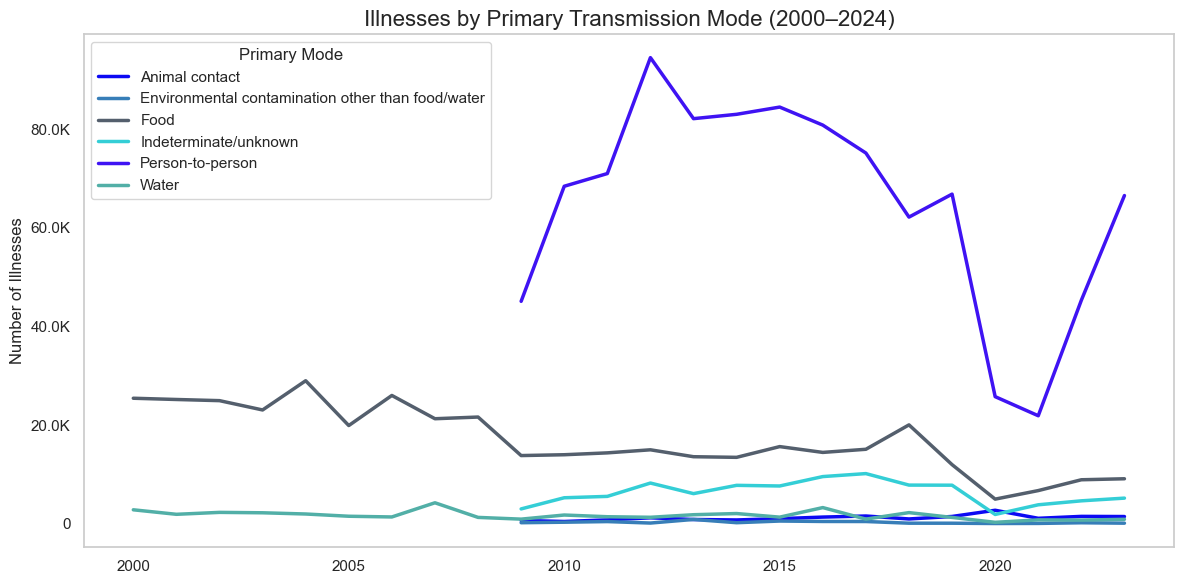

In [ ]:
# How did illness counts differ across primary transmission modes?

# Compute mode counts for the period
mode_year = df_subset.groupby(["Year","Primary Mode"])["Illnesses"].sum().unstack()

# Palette
palette = ["#0C09F3", '#377EB8', "#545f6d","#34CED6", "#3F13F3", "#52AFA7"] 

plt.figure(figsize=(12,6))

# Plot each line with a color from the palette
for i, mode in enumerate(mode_year.columns):
    plt.plot(mode_year.index, mode_year[mode], label=mode, color=palette[i % len(palette)], linewidth=2.5)

plt.title("Illnesses by Primary Transmission Mode (2000–2024)", fontsize=16)
plt.ylabel("Number of Illnesses") 
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.legend(title="Primary Mode")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.grid(False) 
plt.show()

In [ ]:
# Total Outbreaks per Year (2000–2024)

annual_outbreaks = df_subset.groupby("Year")["Illnesses"].count()
annual_outbreaks

Year
2000    1465
2001    1295
2002    1372
2003    1127
2004    1381
2005    1015
2006    1308
2007    1206
2008    1091
2009    2242
2010    3033
2011    3084
2012    3915
2013    3973
2014    3933
2015    4214
2016    4331
2017    4147
2018    4169
2019    4199
2020    1641
2021    2017
2022    2945
2023    3842
Name: Illnesses, dtype: int64

In [ ]:
# Average Illnesses per Outbreak by Year (2000-2024)

avg_size = df_subset.groupby("Year")["Illnesses"].mean()
avg_size

Year
2000    19.270990
2001    20.898842
2002    19.839650
2003    22.401952
2004    22.399710
2005    21.065025
2006    20.905199
2007    21.141791
2008    20.964253
2009    28.359500
2010    29.707880
2011    30.302529
2012    30.733844
2013    26.502139
2014    27.260615
2015    26.245847
2016    25.363196
2017    24.906197
2018    22.374430
2019    21.285544
2020    21.649604
2021    16.969261
2022    20.765025
2023    21.656689
Name: Illnesses, dtype: float64

In [ ]:
# Compare illnesses by primary transmission mode pre-2012 vs. post-2012

df_period = df_subset.assign(period=np.where(df_subset["Year"]<2012,"<2012",
                         np.where(df_subset["Year"]==2012,"2012",">2012")))
mode_summary = df_period.groupby(["period","Primary Mode"])["Illnesses"].sum()

mode_summary

period  Primary Mode                                     
2012    Animal contact                                         1168.0
        Environmental contamination other than food/water       102.0
        Food                                                  14972.0
        Indeterminate/unknown                                  8223.0
        Person-to-person                                      94585.0
        Water                                                  1273.0
<2012   Animal contact                                         1794.0
        Environmental contamination other than food/water       845.0
        Food                                                 258557.0
        Indeterminate/unknown                                 13724.0
        Person-to-person                                     184638.0
        Water                                                 23372.0
>2012   Animal contact                                        14414.0
        Environmental contaminat